To use this, change ``TQ`` and ``sm``, to create **strings** that represent the QCD transition temperature and the multiplicative factor for all scattering rates.

In [1]:
sm = "2"
TQ_vals = ["180", "360", "720"]

In [2]:
TQ = "180"
sm = "2"
QCD_T = float(TQ)
scat_mult = float(sm)

In [3]:
import numpy as np
import spline_gstar as sg
import newQCDtransition as nw
import importlib

2.54 2.54 1.84
import Emma3
2.54 2.54 1.84
import Emma3
2.54 2.54 1.84
2.54 2.54 1.84
import Emma3
2.54 2.54 1.84
import Emma3
import Emma3
2.54 2.54 1.84
import Emma3
2.54 2.54 1.84
import Emma3


In [4]:
scat_mult = float(sm)
QCD_T = float(TQ_vals[0])

T, g, gs = nw.new_gstar(QCD_T, std_absolute_T=False)

sg.save_spline_params(T, g, gs)


e = 1.27
mu = 1.27
tau = 0.92

np.savez("Scatter_Rate_Constants.npz", e=e*scat_mult, mu=mu*scat_mult, tau=tau*scat_mult)

In [5]:
import subprocess
import run_three_nu
import Num_SH_fast
from AnalysisTools import MSNDM_model

In [4]:
for TQ in TQ_vals:
    QCD_T = float(TQ)
    T, g, gs = nw.new_gstar(QCD_T, std_absolute_T=False)

    sg.save_spline_params(T, g, gs)

    importlib.reload(run_three_nu)
    importlib.reload(Num_SH_fast)
    
    folder_name = TQ + "-" + sm + "x"
    file_name = folder_name[:-1]
    %time subprocess.run(["python", "parallel_run.py", folder_name, file_name], capture_output = True, text = True)    

2.54 2.54 1.84
import Emma3
2.54 2.54 1.84
import Emma3
2.54 2.54 1.84
import Emma3


<module 'Num_SH_fast' from '/Users/ckishimoto/Desktop/git/new_QCD/Num_SH_fast.py'>

<Figure size 432x288 with 0 Axes>

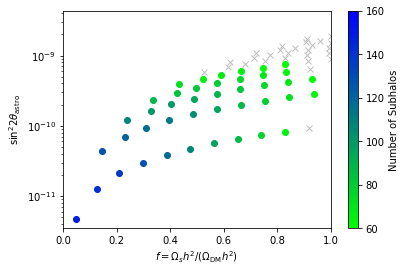

Folder 360-2x does not exist. Abort.
Output file {} from Num_SH.solve() does not exist. Abort.
No data file for this model exists. Abort.
Folder 720-2x does not exist. Abort.
Output file {} from Num_SH.solve() does not exist. Abort.
No data file for this model exists. Abort.


In [6]:
for TQ in TQ_vals:
    folder_name = TQ + "-" + sm + "x"
    file_name = folder_name[:-1]
    
    data = MSNDM_model(folder_name, file_name)
    data.make_mixscatter(save_fig=False)